In [31]:
#STEP 1: Import Libraries
import pandas as pd
import numpy as np

# Text processing
import re
import nltk
from nltk.corpus import stopwords   
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Import the Cross-Validation Tools
from sklearn.model_selection import cross_val_score
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [4]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
import nltk
#Natural Language Toolkit
nltk.data.path.append("C:/Users/ACER/nltk_data")

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# STEP 2: Load Dataset
df = pd.read_csv("SpamAssasin.csv")

# View first rows
df.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [207]:
dir()

['ENGLISH_STOP_WORDS',
 'In',
 'LinearSVC',
 'LogisticRegression',
 'MultinomialNB',
 'Out',
 'SVC',
 'TfidfVectorizer',
 'WordNetLemmatizer',
 'X',
 'X_test',
 'X_tfidf',
 'X_train',
 '_',
 '_10',
 '_100',
 '_102',
 '_104',
 '_106',
 '_108',
 '_110',
 '_112',
 '_114',
 '_116',
 '_118',
 '_12',
 '_120',
 '_122',
 '_124',
 '_125',
 '_127',
 '_128',
 '_130',
 '_132',
 '_133',
 '_134',
 '_135',
 '_136',
 '_137',
 '_138',
 '_14',
 '_140',
 '_141',
 '_142',
 '_144',
 '_146',
 '_148',
 '_150',
 '_152',
 '_154',
 '_156',
 '_158',
 '_16',
 '_160',
 '_162',
 '_164',
 '_166',
 '_168',
 '_170',
 '_172',
 '_174',
 '_176',
 '_178',
 '_18',
 '_180',
 '_182',
 '_184',
 '_186',
 '_188',
 '_19',
 '_190',
 '_192',
 '_194',
 '_196',
 '_198',
 '_2',
 '_20',
 '_200',
 '_202',
 '_204',
 '_206',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_28',
 '_30',
 '_32',
 '_33',
 '_34',
 '_35',
 '_36',
 '_38',
 '_39',
 '_4',
 '_40',
 '_41',
 '_42',
 '_44',
 '_46',
 '_48',
 '_50',
 '_52',
 '_54',
 '_56',
 '_58',
 

In [41]:
#STEP 3: Text Preprocessing 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)


In [43]:
# Combine & Clean Text
df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,"Re: New Sequences Window Date: Wed, 21 ...",new sequences window date wed aug chris garrig...
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,zzzzteana alexander martin posted tassos papad...
2,[zzzzteana] Moscow bomber Man Threatens Explos...,zzzzteana moscow bomber man threatens explosio...
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,irr klez virus wont die klez virus wont die pr...
4,Re: [zzzzteana] Nothing like mama used to make...,zzzzteana like mama used make adding cream spa...


In [35]:
df[['subject', 'body', 'text']].head(3)

,subject,body,text
0,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...","Re: New Sequences Window Date: Wed, 21 ..."
1,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",[zzzzteana] RE: Alexander Martin A posted:\nTa...
2,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,[zzzzteana] Moscow bomber Man Threatens Explos...


In [21]:
#STEP 4: CHECK MISSING VALUES
df.isna().replace({True: "Yes", False: "No"})
#data.isna()


,sender,receiver,date,subject,body,label,urls
0,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...
5804,No,No,No,No,No,No,No
5805,No,No,No,No,No,No,No
5806,No,No,No,No,No,No,No
5807,No,No,No,No,No,No,No


In [23]:
#STEP 5: DROP MISSING VALUES
df = df.dropna()
df.isna().sum()


sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64

In [25]:
#STEP 6: REMOVE UNNECESSARY COLUMNS
df = df.drop(['sender', 'receiver', 'date'], axis=1, errors='ignore')
df.head()


,subject,body,label,urls
0,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [229]:
#STEP 7: Get info about columns: data types, non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB


In [157]:
# Count rows with any missing value
missing_rows = df.isna().any(axis=1)
print("Number of rows with missing values:", missing_rows.sum())

# View first few rows with missing values
print(df[missing_rows].head())


Number of rows with missing values: 227
                             sender receiver  \
71   Lucas Gonze <lgonze@panix.com>      NaN   
74   Lucas Gonze <lgonze@panix.com>      NaN   
296  Lucas Gonze <lgonze@panix.com>      NaN   
298  Lucas Gonze <lgonze@panix.com>      NaN   
463  Lucas Gonze <lgonze@panix.com>      NaN   

                                      date  \
71   Fri, 23 Aug 2002 16:30:01 -0400 (EDT)   
74   Fri, 23 Aug 2002 16:33:15 -0400 (EDT)   
296  Sat, 24 Aug 2002 10:51:05 -0400 (EDT)   
298  Sat, 24 Aug 2002 11:26:34 -0400 (EDT)   
463   Fri, 6 Sep 2002 10:14:00 -0400 (EDT)   

                                               subject  \
71                               Re: The case for spam   
74                               Re: The case for spam   
296  Re: The GOv gets tough on Net Users.....er Pir...   
298                              Re: The case for spam   
463         Re: Selling Wedded Bliss (was Re: Ouch...)   

                                             

In [159]:
# Drop rows with missing values
df = df.dropna()
print("Rows after removing missing values:", df.shape[0])


Rows after removing missing values: 5582


In [161]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# View first few duplicates
print(df[duplicate_rows].head())


Number of duplicate rows: 0
Empty DataFrame
Columns: [sender, receiver, date, subject, body, label, urls, text, clean_text, email_length, word_count]
Index: []


In [165]:
# Keep only required columns
df = df[['subject', 'body', 'label']]

# Check missing values
df.isnull().sum()

subject    0
body       0
label      0
dtype: int64

In [167]:
df.head()

,subject,body,label
0,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0
1,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0
3,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0
4,Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0


In [163]:
#LABEL VERIFICATION
df['label'].value_counts()

label
0    3924
1    1658
Name: count, dtype: int64

In [39]:
#Mapping of spam and ham labels
df['label'].unique()

array([0, 1], dtype=int64)

In [37]:
# Step 1: Check unique labels
print("Unique labels in the dataset:", df['label'].unique())

# Step 2: Count how many emails belong to each label
print("\nLabel distribution:")
print(df['label'].value_counts())

# Step 3: Encode labels (Ham = 0, Spam = 1)
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Verify encoding
print("\nEncoded labels:")
print(df[['label', 'label_encoded']].head())


Unique labels in the dataset: [0 1]

Label distribution:
label
0    3924
1    1658
Name: count, dtype: int64

Encoded labels:
   label  label_encoded
0      0            NaN
1      0            NaN
2      0            NaN
3      0            NaN
4      0            NaN


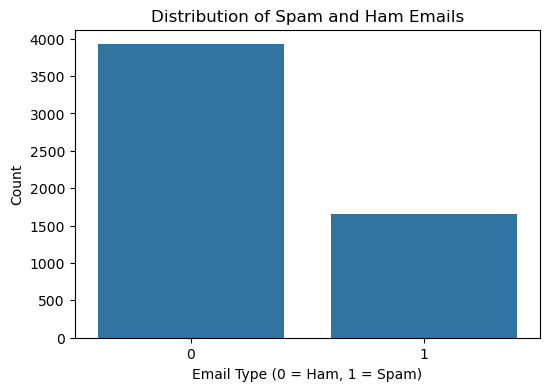

In [171]:
#STEP 8: DISTRIBUTION GRAPH
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.xlabel("Email Type (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.title("Distribution of Spam and Ham Emails")
plt.show()


In [35]:
#STEP 9: FEATURE ENGINEERING FOR HEAT MAP
df['email_length'] = df['body'].astype(str).apply(len)
df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))


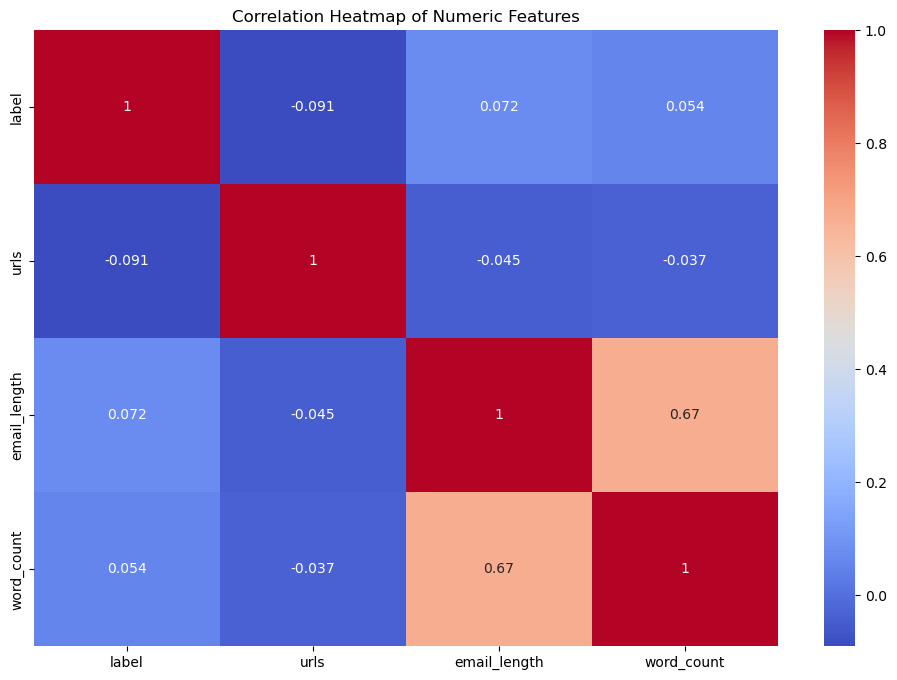

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation only for numeric columns
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [45]:
#STEP 11: Feature Extraction (TF-IDF)
X = df['clean_text']
y = df['label']   # 1 = spam, 0 = ham

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_tfidf.shape


(5809, 5000)

In [47]:
#STEP 12: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
       

lr = LogisticRegression()
svm = LinearSVC()
nb = MultinomialNB()

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)


MultinomialNB()

In [237]:
#STEP 13: Train Models
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [234]:
#LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [233]:
#Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

Naive Bayes Cross-Validation Scores: [0.98064516 0.97311828 0.96770721 0.98277718 0.97739505]
Naive Bayes Mean Accuracy: 0.9763
Naive Bayes Std Deviation: 0.0054
--------------------------------------------------
Logistic Regression Cross-Validation Scores: [0.97419355 0.97096774 0.95371367 0.97847147 0.9752422 ]
Logistic Regression Mean Accuracy: 0.9705
Logistic Regression Std Deviation: 0.0087
--------------------------------------------------
SVM Cross-Validation Scores: [0.98387097 0.97849462 0.97739505 0.99031216 0.98815931]
SVM Mean Accuracy: 0.9836
SVM Std Deviation: 0.0051
--------------------------------------------------


C:\Users\ACER\AppData\Local\Temp\ipykernel_13304\3133169456.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mean_acc.keys()), y=list(mean_acc.values()), palette="viridis")


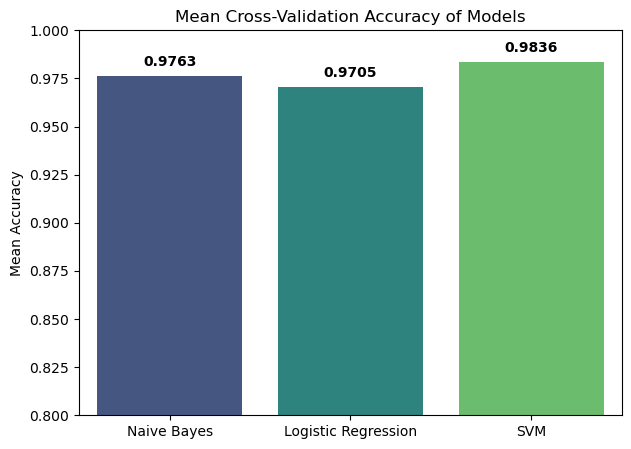

In [53]:
# Step 14: Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC


cv_models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

cv_results = {}

for name, model in cv_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Accuracy: {scores.mean():.4f}")
    print(f"{name} Std Deviation: {scores.std():.4f}")
    print("-"*50)

# Calculate mean accuracy
mean_acc = {model: scores.mean() for model, scores in cv_results.items()}

plt.figure(figsize=(7,5))
sns.barplot(x=list(mean_acc.keys()), y=list(mean_acc.values()), palette="viridis")
plt.ylim(0.8, 1)  # Adjust if your accuracies are high
plt.ylabel("Mean Accuracy")
plt.title("Mean Cross-Validation Accuracy of Models")
for i, v in enumerate(mean_acc.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()

In [241]:
#STEP 15: Model Evaluation Function
#Evaluate All Models
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)
evaluate_model("Naive Bayes", nb_model)
evaluate_model("Logistic Regression", lr_model)
evaluate_model("Support Vector Machine", svm_model)

Naive Bayes
Accuracy: 0.9758281110116384
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       783
           1       0.97      0.95      0.96       334

    accuracy                           0.98      1117
   macro avg       0.97      0.97      0.97      1117
weighted avg       0.98      0.98      0.98      1117

--------------------------------------------------
Logistic Regression
Accuracy: 0.9704565801253358
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       783
           1       0.98      0.92      0.95       334

    accuracy                           0.97      1117
   macro avg       0.97      0.96      0.96      1117
weighted avg       0.97      0.97      0.97      1117

--------------------------------------------------
Support Vector Machine
Accuracy: 0.9883616830796778
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    

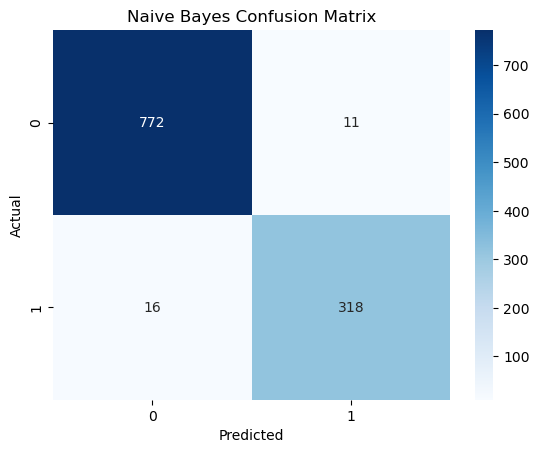

In [249]:
#STEP 16: Confusion Matrix (Naive Bayes)
cm = confusion_matrix(y_test, nb_model.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


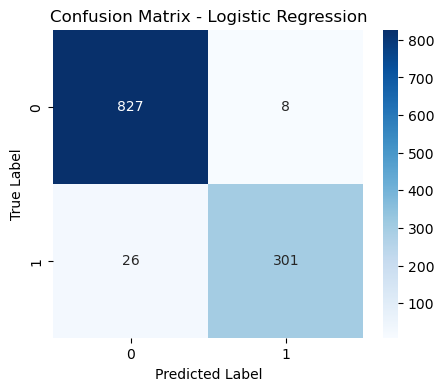

In [67]:
#LOGISTIC REGRESSION HEATMAP
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


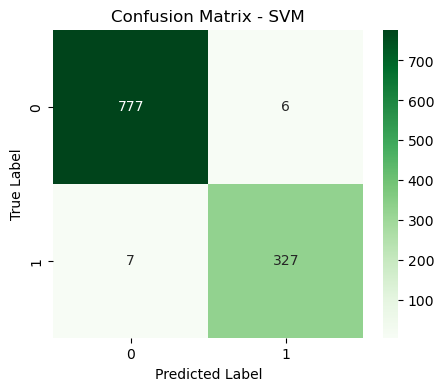

In [247]:
#SVM REGRESSION HEATMAP
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


In [267]:

df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')

# Function to predict using Naive Bayes
def predict_email(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = nb_model.predict(vector)
    return "Spam" if prediction[0] == 1 else "Ham"

# Predict first 5 emails
for i in range(5):
    email = df['text'].iloc[i]
    result = predict_email(email)
    print(f"\nEmail {i+1}:")
    print("Content:", email)
    print("Prediction:", result)



Email 1:
Content: Re: New Sequences Window Date:        Wed, 21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues      Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>   | I can't reproduce this error. For me it is very repeatable... (like every time, without fail). This is the debug log of the pick happening ... 18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ... Note, if I run the pick command by hand ... delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit That's where the "1 hit" comes from (obviously).  The version of nmh I'm using is ... delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 ICT 200

In [289]:
# Safe Full Prediction Flow

def predict_email_model(emails, model, model_name):
    # Clean emails
    cleaned_emails = [clean_text(e) for e in emails]
    
    # TF-IDF vectorization
    vectors = tfidf.transform(cleaned_emails)
    
    # Model predictions
    predictions = model.predict(vectors)
    
    # Confidence scores (if available)
    if hasattr(model, "predict_proba"):
        confidence = model.predict_proba(vectors).max(axis=1)
    else:
        confidence = np.full(len(predictions), np.nan)
    
    # Return as DataFrame
    df_result = pd.DataFrame({
        "Model": model_name,
        "Email": emails,
        "Prediction": ["Spam" if p == 1 else "Ham" for p in predictions],
        "Confidence": confidence
    })
    
    return df_result

all_models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model
}

results_list = []

for name, model in all_models.items():
    preds = predict_email_model(sample_emails, model, name)
    results_list.append(preds)

all_results = pd.concat(results_list, ignore_index=True)
all_results


,Model,Email,Prediction,Confidence
0,Naive Bayes,"Re: New Sequences Window Date: Wed, 21 ...",Ham,0.997128
1,Naive Bayes,[zzzzteana] RE: Alexander Martin A posted:\nTa...,Ham,0.975763
2,Naive Bayes,[zzzzteana] Moscow bomber Man Threatens Explos...,Ham,0.961654
3,Naive Bayes,[IRR] Klez: The Virus That Won't Die Klez: Th...,Ham,0.902869
4,Naive Bayes,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.987901
5,Logistic Regression,"Re: New Sequences Window Date: Wed, 21 ...",Ham,0.951942
6,Logistic Regression,[zzzzteana] RE: Alexander Martin A posted:\nTa...,Ham,0.910391
7,Logistic Regression,[zzzzteana] Moscow bomber Man Threatens Explos...,Ham,0.931353
8,Logistic Regression,[IRR] Klez: The Virus That Won't Die Klez: Th...,Ham,0.880040
9,Logistic Regression,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.949245


In [271]:
# Logistic Regression Predictions (CSV Emails)

csv_emails = df['text'].head(20).tolist()

def predict_logistic_regression(texts, model):
    # Clean texts
    cleaned_texts = [clean_text(t) for t in texts]
    
    # Vectorize text
    vectors = tfidf.transform(cleaned_texts)
    
    # Predictions
    predictions = model.predict(vectors)
    
    # Confidence / reliability scores
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(vectors)
        confidence = probs.max(axis=1)
    else:
        confidence = np.full(len(predictions), np.nan)
    
    # Create results DataFrame
    df_lr = pd.DataFrame({
        "Email Text": texts,
        "Prediction": ["Spam" if p == 1 else "Ham" for p in predictions],
        "Confidence": confidence
    })
    
    return df_lr

# Run Logistic Regression prediction
lr_predictions = predict_logistic_regression(csv_emails, lr_model)


print("=== Logistic Regression Predictions ===")
display(lr_predictions)


=== Logistic Regression Predictions ===


,Email Text,Prediction,Confidence
0,"Re: New Sequences Window Date: Wed, 21 ...",Ham,0.951942
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,Ham,0.910391
2,[zzzzteana] Moscow bomber Man Threatens Explos...,Ham,0.931353
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,Ham,0.880040
4,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.949245
5,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.961176
6,[zzzzteana] Playboy wants to go out with a ban...,Ham,0.907104
7,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.964840
8,[zzzzteana] Meaningful sentences The Scotsman\...,Ham,0.888248
9,[SAtalk] SA CGI Configurator Scripts I have be...,Ham,0.889713


In [275]:

# Naive Bayes Predictions
csv_emails = df['text'].head(20).tolist()

def predict_naive_bayes(texts, model):
    # Clean texts (already cleaned, but kept for safety)
    cleaned_texts = [clean_text(t) for t in texts]
    
    # Vectorize
    vectors = tfidf.transform(cleaned_texts)
    
    # Predictions
    predictions = model.predict(vectors)
    
    # Confidence scores (Naive Bayes has predict_proba)
    probs = model.predict_proba(vectors)
    confidence = probs.max(axis=1)
    
    # Result DataFrame
    df_nb = pd.DataFrame({
        "Email Text": texts,
        "Prediction": ["Spam" if p == 1 else "Ham" for p in predictions],
        "Confidence": confidence
    })
    
    return df_nb

# Run Naive Bayes prediction
nb_predictions = predict_naive_bayes(csv_emails, nb_model)

print("=== Naive Bayes Predictions ===")
display(nb_predictions)


=== Naive Bayes Predictions ===


,Email Text,Prediction,Confidence
0,"Re: New Sequences Window Date: Wed, 21 ...",Ham,0.997128
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,Ham,0.975763
2,[zzzzteana] Moscow bomber Man Threatens Explos...,Ham,0.961654
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,Ham,0.902869
4,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.987901
5,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.994321
6,[zzzzteana] Playboy wants to go out with a ban...,Ham,0.963318
7,Re: [zzzzteana] Nothing like mama used to make...,Ham,0.994876
8,[zzzzteana] Meaningful sentences The Scotsman\...,Ham,0.920848
9,[SAtalk] SA CGI Configurator Scripts I have be...,Ham,0.992703


In [151]:

# SVM Predictions

csv_emails = df['text'].head(20).tolist()

def predict_svm(texts, model):
    # Clean texts
    cleaned_texts = [clean_text(t) for t in texts]
    
    # Vectorize
    vectors = tfidf.transform(cleaned_texts)
    
    # Predictions
    predictions = model.predict(vectors)
    
    # SVM doesn't have predict_proba by default
    confidence = np.full(len(predictions), np.nan)
    
    # Result DataFrame
    df_svm = pd.DataFrame({
        "Email Text": texts,
        "Prediction": ["Spam" if p == 1 else "Ham" for p in predictions],
        "Confidence": confidence
    })
    
    return df_svm

# Run SVM prediction
svm_predictions = predict_svm(csv_emails, svm_model)

# Display predictions
print("=== SVM Predictions ===")
display(svm_predictions)


=== SVM Predictions ===


,Email Text,Prediction,Confidence
0,"Re: New Sequences Window Date: Wed, 21 ...",Ham,NaN
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,Ham,NaN
2,[zzzzteana] Moscow bomber Man Threatens Explos...,Ham,NaN
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,Ham,NaN
4,Re: [zzzzteana] Nothing like mama used to make...,Ham,NaN
5,Re: [zzzzteana] Nothing like mama used to make...,Ham,NaN
6,[zzzzteana] Playboy wants to go out with a ban...,Ham,NaN
7,Re: [zzzzteana] Nothing like mama used to make...,Ham,NaN
8,[zzzzteana] Meaningful sentences The Scotsman\...,Ham,NaN
9,[SAtalk] SA CGI Configurator Scripts I have be...,Ham,NaN


In [80]:
#STEP 17: Save Model
import pickle

pickle.dump(nb_model, open("spam_nb_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))


In [82]:
print(os.path.exists("spam_nb_model.pkl"))
print(os.path.exists("tfidf.pkl"))

True
True


In [101]:
# Step:18 Measure Training Time
import time

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

training_times = {}

for name, model in models.items():
    start = time.time()              # Start timer
    model.fit(X_train, y_train)      # Train model
    end = time.time()                # End timer
    training_times[name] = end - start
    print(f"{name} Training Time: {training_times[name]:.4f} seconds")


Naive Bayes Training Time: 0.0120 seconds
Logistic Regression Training Time: 0.1150 seconds
SVM Training Time: 0.0380 seconds


C:\Users\ACER\AppData\Local\Temp\ipykernel_13488\1351945205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_times.keys()), y=list(training_times.values()), palette="coolwarm")


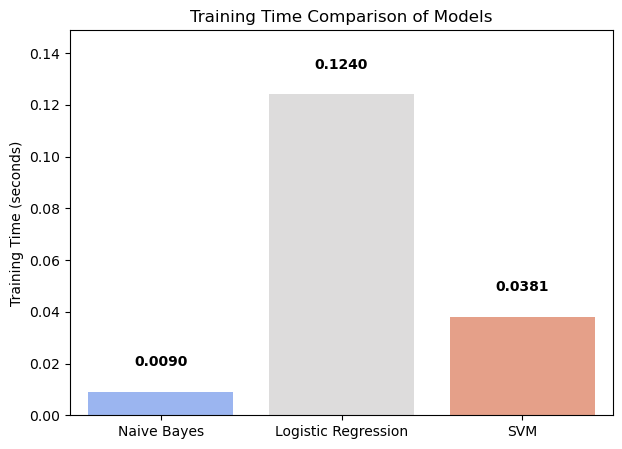

In [93]:
plt.figure(figsize=(7,5))
sns.barplot(x=list(training_times.keys()), y=list(training_times.values()), palette="coolwarm")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison of Models")

for i, v in enumerate(training_times.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')  

# Adjust y-axis to give some padding at the bottom
min_time = min(training_times.values())
plt.ylim(0, max(training_times.values())*1.2)  
plt.show()


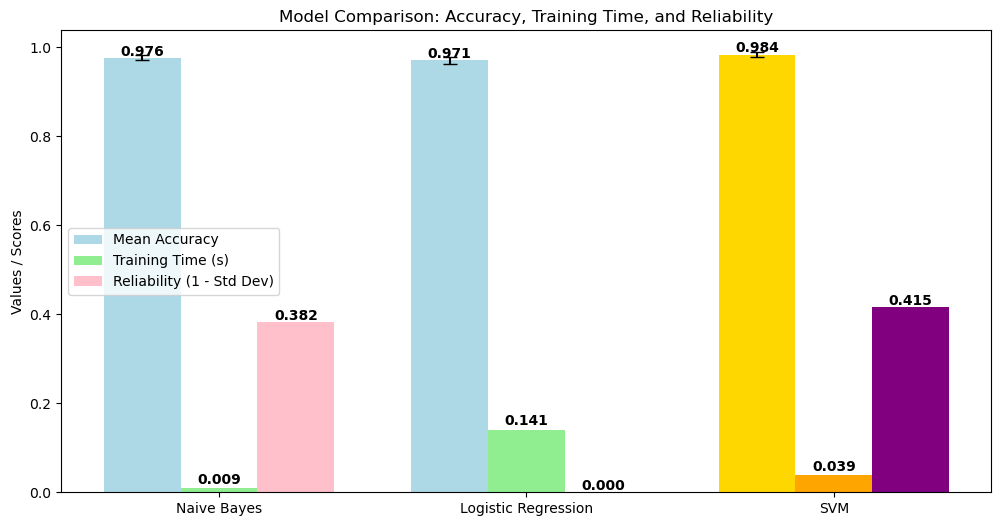

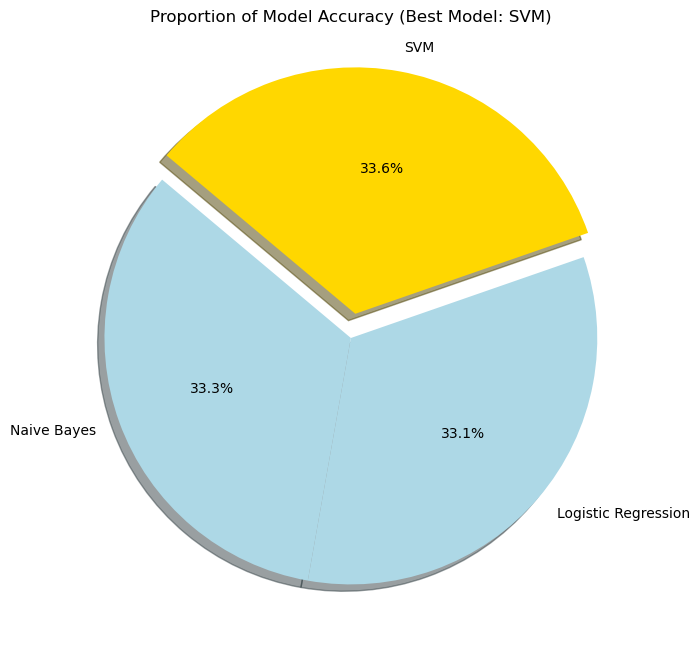

In [117]:
#Model Comparison showing Mean Accuracy, Std Dev, and Training Time, using bar graph and pie chart,
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute Reliability as 1 - Std Dev (higher = more reliable)
comparison_df["Reliability"] = 1 - comparison_df["Std Dev"] / max(comparison_df["Std Dev"])

# Identify the best model based on Mean Accuracy
best_idx = comparison_df["Mean Accuracy"].idxmax()
best_model = comparison_df.loc[best_idx, "Model"]

# BAR GRAPH: Accuracy, Training Time, and Reliability
models_list = comparison_df["Model"].tolist()
mean_acc = comparison_df["Mean Accuracy"].tolist()
train_time = comparison_df["Training Time (s)"].tolist()
reliab = comparison_df["Reliability"].tolist()
std_dev = comparison_df["Std Dev"].tolist()

x = np.arange(len(models_list))
bar_width = 0.25

plt.figure(figsize=(12,6))

# Plot Mean Accuracy bars
plt.bar(x - bar_width, mean_acc, width=bar_width,
        color=['gold' if i==best_idx else 'lightblue' for i in range(len(models_list))],
        yerr=std_dev, capsize=5, label="Mean Accuracy")

# Plot Training Time bars
plt.bar(x, train_time, width=bar_width,
        color=['orange' if i==best_idx else 'lightgreen' for i in range(len(models_list))],
        label="Training Time (s)")

# Plot Reliability bars
plt.bar(x + bar_width, reliab, width=bar_width,
        color=['purple' if i==best_idx else 'pink' for i in range(len(models_list))],
        label="Reliability (1 - Std Dev)")

# Labels and title
plt.xticks(x, models_list)
plt.ylabel("Values / Scores")
plt.title("Model Comparison: Accuracy, Training Time, and Reliability")
plt.legend()

# Annotate values on top of bars
for i in range(len(models_list)):
    plt.text(x[i] - bar_width, mean_acc[i]+0.005, f"{mean_acc[i]:.3f}", ha='center', fontweight='bold')
    plt.text(x[i], train_time[i]+0.01, f"{train_time[i]:.3f}", ha='center', fontweight='bold')
    plt.text(x[i] + bar_width, reliab[i]+0.005, f"{reliab[i]:.3f}", ha='center', fontweight='bold')

plt.show()

# -------------------------------
# PIE CHART: Highlighting Best Model Based on Accuracy
plt.figure(figsize=(8,8))

colors = ['gold' if i==best_idx else 'lightblue' for i in range(len(models_list))]
explode = [0.1 if i==best_idx else 0 for i in range(len(models_list))]

plt.pie(mean_acc, labels=models_list, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)

plt.title(f"Proportion of Model Accuracy (Best Model: {best_model})")
plt.show()


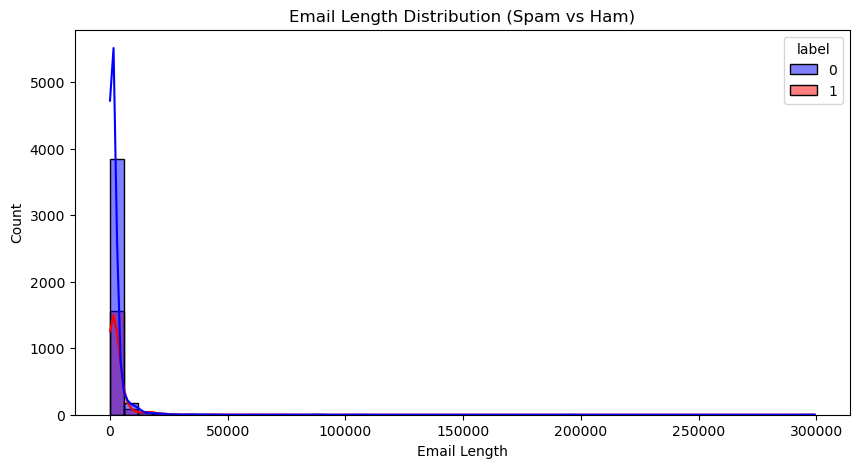

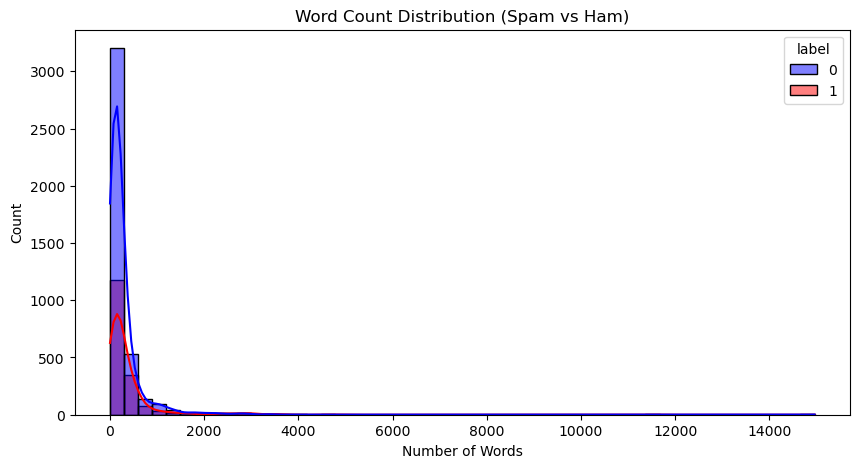

In [119]:
#Email length and word count distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have these columns; if not, create them
df['email_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Plot Email Length Distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='email_length', hue='label', bins=50, kde=True, palette={0:'blue',1:'red'})
plt.title("Email Length Distribution (Spam vs Ham)")
plt.xlabel("Email Length")
plt.ylabel("Count")
plt.show()

# Plot Word Count Distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette={0:'blue',1:'red'})
plt.title("Word Count Distribution (Spam vs Ham)")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


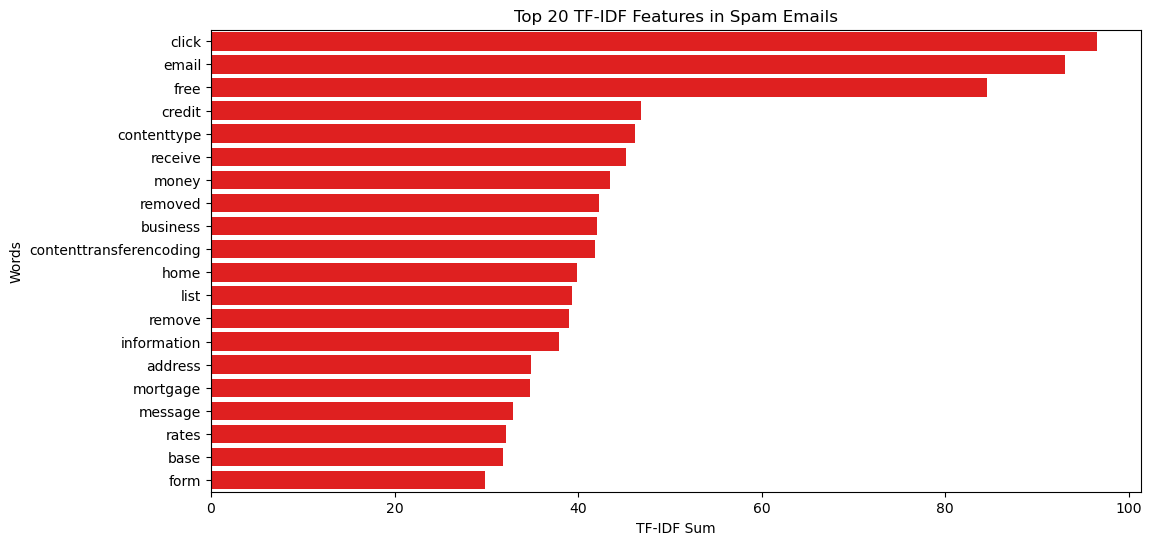

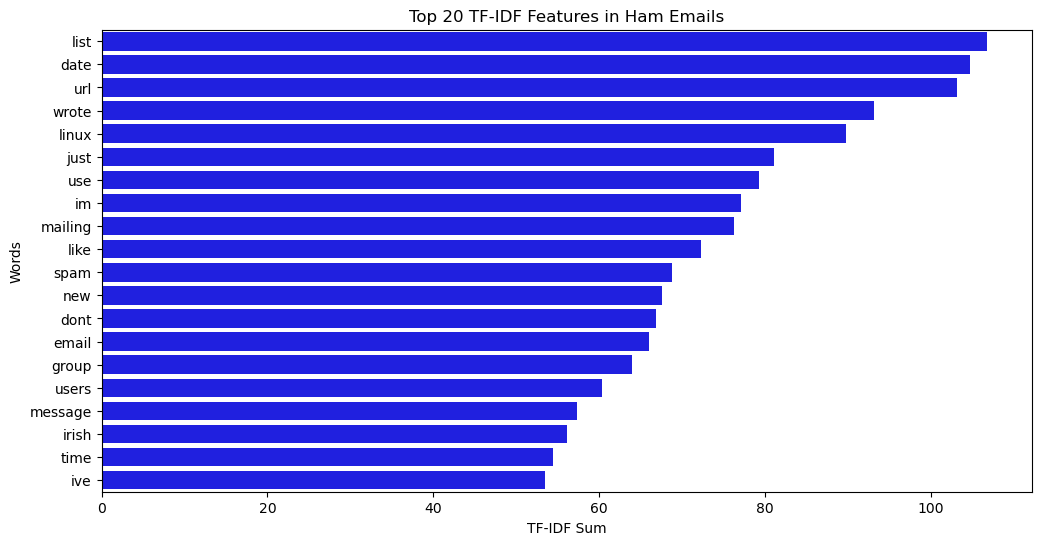

In [121]:
#Top 20 TF-IDF features distribution for spam and ham
import pandas as pd
import numpy as np

# Extract top features
feature_array = np.array(tfidf.get_feature_names_out())
# Sum TF-IDF values for each feature across all spam and ham emails
spam_tfidf_sum = np.array(X_tfidf[y==1].sum(axis=0)).flatten()
ham_tfidf_sum = np.array(X_tfidf[y==0].sum(axis=0)).flatten()

top_spam_idx = spam_tfidf_sum.argsort()[-20:][::-1]
top_ham_idx = ham_tfidf_sum.argsort()[-20:][::-1]

# Plot Spam Top Features
plt.figure(figsize=(12,6))
sns.barplot(x=spam_tfidf_sum[top_spam_idx], y=feature_array[top_spam_idx], color='red')
plt.title("Top 20 TF-IDF Features in Spam Emails")
plt.xlabel("TF-IDF Sum")
plt.ylabel("Words")
plt.show()

# Plot Ham Top Features
plt.figure(figsize=(12,6))
sns.barplot(x=ham_tfidf_sum[top_ham_idx], y=feature_array[top_ham_idx], color='blue')
plt.title("Top 20 TF-IDF Features in Ham Emails")
plt.xlabel("TF-IDF Sum")
plt.ylabel("Words")
plt.show()


In [57]:
import pickle

# Load saved model and vectorizer
nb_model = pickle.load(open("spam_nb_model.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))


In [95]:
# User input prediction

def predict_user_email():
    user_email = input("Enter your email text: ")

    # Clean the email
    cleaned = clean_text(user_email)

    # Vectorize
    vector = tfidf.transform([cleaned])

    # Predict using trained model (Naive Bayes here)
    prediction = nb_model.predict(vector)[0]

    # Output
    if prediction == 1:
        print("Prediction: SPAM ")
    else:
        print("Prediction: HAM ")

# Run prediction
predict_user_email()


Enter your email text:  pratistha708@gmail.com


Prediction: HAM 


In [93]:
import pickle
import numpy as np
import os
# Load saved models
nb_model = pickle.load(open("spam_nb_model.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))

# Load other models if saved separately
lr_model = pickle.load(open("spam_lr_model.pkl", "rb")) if os.path.exists("spam_lr_model.pkl") else None
svm_model = pickle.load(open("spam_svm_model.pkl", "rb")) if os.path.exists("spam_svm_model.pkl") else None

def advanced_email_predictor(email_text):
    results = []

    # Clean input
    cleaned = clean_text(email_text)
    vector = tfidf.transform([cleaned])

    # -------------------------
    # Naive Bayes
    nb_pred = nb_model.predict(vector)[0]
    nb_prob = nb_model.predict_proba(vector).max()
    results.append(("Naive Bayes", nb_pred, nb_prob))

    # -------------------------
    # Logistic Regression
    if lr_model:
        lr_pred = lr_model.predict(vector)[0]
        lr_prob = lr_model.predict_proba(vector).max()
        results.append(("Logistic Regression", lr_pred, lr_prob))

    # -------------------------
    # SVM (No probability)
    if svm_model:
        svm_pred = svm_model.predict(vector)[0]
        results.append(("SVM", svm_pred, None))

    # -------------------------
    # Ensemble Decision (Majority Vote)
    votes = [r[1] for r in results]
    final_prediction = 1 if votes.count(1) > votes.count(0) else 0

    # -------------------------
    # Display Results
    print("\n Individual Model Predictions:")
    for name, pred, conf in results:
        label = "Spam " if pred == 1 else "Ham "
        conf_text = f"(Confidence: {conf:.2f})" if conf is not None else "(No probability)"
        print(f" - {name}: {label} {conf_text}")

    print("\n Final Ensemble Decision:")
    print("SPAM " if final_prediction == 1 else "HAM ")

user_email = input("Enter email text:\n")
advanced_email_predictor(user_email)



Enter email text:
 "Congratulations!!! Click here to WIN $$$"



 Individual Model Predictions:
 - Naive Bayes: Spam  (Confidence: 0.74)

 Final Ensemble Decision:
SPAM 
